In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
import scipy
import scipy.io
import soundpy as sp
import sounddevice

speech_data = scipy.io.loadmat('project1.mat')
fs = speech_data['fs'][0]
speech_desired = speech_data['reference'][0]
speech_noisy = speech_data['primary'][0]

# Normalization
# wav = wav / np.sqrt(np.sum(wav ** 2))

In [2]:
sounddevice.play(speech_data['primary'][0], fs)

In [3]:
sounddevice.play(speech_data['reference'][0], fs)

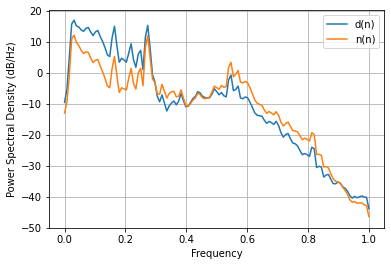

In [4]:
l1 = plt.psd(speech_desired)
l2 = plt.psd(speech_noisy)
plt.legend(['d(n)','n(n)'])

In [5]:
# APA Family (APA1)

sample_size = 50

step_size = 0.005

filter_order = 2

weight_filter = np.random.normal(0, 0.1, filter_order)

weight_APA1_store = []
error_APA1_store = []

for start in range(int((speech_desired.shape[0]-filter_order)/sample_size)):
    window_filter_x = np.array([speech_noisy[start*sample_size+i:start*sample_size+i+filter_order][::-1] for i in range(sample_size)])
    window_filter_y = np.array([speech_desired[start*sample_size+i+filter_order] for i in range(sample_size)])
    
    weight_filter = weight_filter + step_size * window_filter_x.T @ (window_filter_y - window_filter_x @ weight_filter)
    
    weight_APA1_store.append(weight_filter)
    error_APA1_store.append(window_filter_y - window_filter_x @ weight_filter)

error_APA1_store = np.array(error_APA1_store).flatten()

# # Calculate ERLE
ERLE = 10 * math.log10(np.sum(speech_desired[0:int((speech_desired.shape[0]-filter_order)/sample_size)*sample_size] ** 2) / np.sum(error_APA1_store ** 2))
ERLE

5.995209266364335

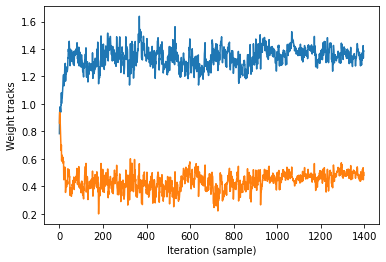

In [6]:
# APA1 filter_order = 2
# weight
plt.plot(np.arange(len(weight_APA1_store)), weight_APA1_store)
plt.xlabel('Iteration')
plt.ylabel('Weight tracks')
plt.show()

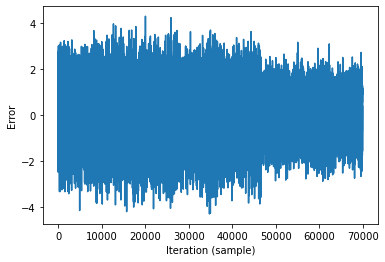

Mean of Error: 0.8054000706143253
Std of Error: 0.6332232906512931


In [8]:
# APA1 filter order = 2
# error
plt.plot(np.arange(len(error_APA1_store)), error_APA1_store)
plt.xlabel('Iteration (sample)')
plt.ylabel('Error')
plt.show()
print('Mean of Error:', np.mean(abs(error_APA1_store)))
print('Std of Error:', np.std(abs(error_APA1_store)))

In [2]:
# APA Family (APA1)

sample_size = 50

step_size = 0.005

filter_order = 10

weight_filter = np.random.normal(0, 0.1, filter_order)

weight_APA1_store = []
error_APA1_store = []

for start in range(int((speech_desired.shape[0]-filter_order)/sample_size)):
    window_filter_x = np.array([speech_noisy[start*sample_size+i:start*sample_size+i+filter_order][::-1] for i in range(sample_size)])
    window_filter_y = np.array([speech_desired[start*sample_size+i+filter_order] for i in range(sample_size)])
    
    weight_filter = weight_filter + step_size * window_filter_x.T @ (window_filter_y - window_filter_x @ weight_filter)
    
    weight_APA1_store.append(weight_filter)
    error_APA1_store.append(window_filter_y - window_filter_x @ weight_filter)

error_APA1_store = np.array(error_APA1_store).flatten()

# # Calculate ERLE
ERLE = 10 * math.log10(np.sum(speech_desired[0:int((speech_desired.shape[0]-filter_order)/sample_size)*sample_size] ** 2) / np.sum(error_APA1_store ** 2))
ERLE

11.044143341703638

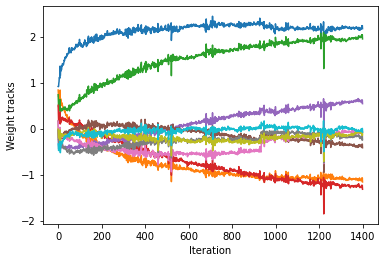

In [3]:
# APA1 
# weight
plt.plot(np.arange(len(weight_APA1_store)), weight_APA1_store)
plt.xlabel('Iteration')
plt.ylabel('Weight tracks')
plt.show()

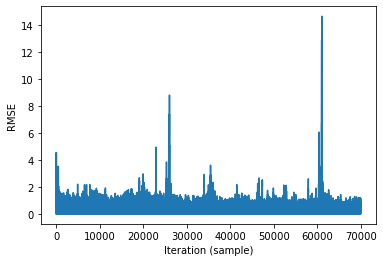

Mean of Error: 0.3786236947713096
Std of Error: 0.4299427317925708


In [4]:
# APA1
# error
plt.plot(np.arange(len(error_APA1_store)), abs(error_APA1_store))
plt.xlabel('Iteration (sample)')
plt.ylabel('RMSE')
plt.show()
print('Mean of Error:', np.mean(abs(error_APA1_store)))
print('Std of Error:', np.std(abs(error_APA1_store)))

Text(0, 0.5, 'Response Amplitude')

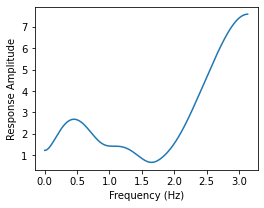

In [37]:
# Frequency Response
import scipy.signal
NumeratorZcoefs = weight_APA1_store[-1]
DenominatorZcoefs = [1]
FreqResponse = scipy.signal.freqz(NumeratorZcoefs, DenominatorZcoefs)
fig = plt.figure(figsize = [4, 3])
ax = fig.add_subplot(111)
ax.plot(FreqResponse[0], abs(np.array(FreqResponse[1])))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Response Amplitude')

In [27]:
# The filter performance as a function of step size

sample_size = 50
filter_order = 10

stepsize_array = np.logspace(-6, -3, 30)

ERROR_store = []
ERLE_store = []
WEIGHT_store = []
weight_APA1_store = []

for mm in range(len(stepsize_array)): # step_size
    
    step_size = stepsize_array[mm]

    weight_APA1_store.append([])
    error_APA1_store = []
    weight_filter = np.zeros((filter_order))

    for start in range(int((speech_desired.shape[0]-filter_order)/sample_size)):
        window_filter_x = np.array([speech_noisy[start*sample_size+i:start*sample_size+i+filter_order][::-1] for i in range(sample_size)])
        window_filter_y = np.array([speech_desired[start*sample_size+i+filter_order] for i in range(sample_size)])

        weight_filter = weight_filter + step_size * window_filter_x.T @ (window_filter_y - window_filter_x @ weight_filter)

        weight_APA1_store[mm].append(weight_filter)
        error_APA1_store.append(window_filter_y - window_filter_x @ weight_filter)

    error_APA1_store = np.array(error_APA1_store).flatten()
        
    ERROR_store.append(np.sqrt(np.sum(error_APA1_store ** 2)/np.sum(speech_desired ** 2)))
    ERLE_store.append(10 * math.log10(np.sum(speech_desired[0:int((speech_desired.shape[0]-filter_order)/sample_size)*sample_size] ** 2) / np.sum(error_APA1_store ** 2)))
    WEIGHT_store.append(weight_filter)


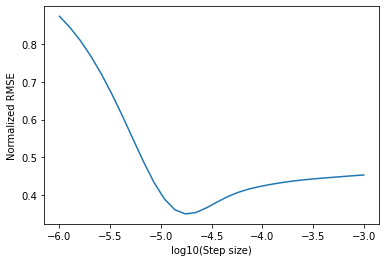

In [28]:
ERROR_opt_weight = []
ERLE_opt_weight = []
for i in range(len(stepsize_array)):
    error_opt_weight = []
    for n in range (filter_order-1, speech_desired.shape[0]):
        error_opt_weight.append(speech_desired[n] - np.dot(WEIGHT_store[i], speech_noisy[n-filter_order+1:n+1][::-1]))
    error_opt_weight = np.array(error_opt_weight)
    ERROR_opt_weight.append(np.sqrt(np.sum(error_opt_weight ** 2)/np.sum(speech_desired ** 2)))
    ERLE_opt_weight.append(10 * math.log10(np.sum(speech_desired[filter_order-1:speech_desired.shape[0]] ** 2) / np.sum(error_opt_weight ** 2)))
    
# Plot ERROR by stepsize
for i in range (len(stepsize_array)):
    stepsize_array[i] = math.log10(stepsize_array[i])
plt.plot(stepsize_array, ERROR_opt_weight) # ERROR_opt_weight, ERROR_store
plt.xlabel('log10(Step size)')
plt.ylabel('Normalized RMSE')
plt.show()

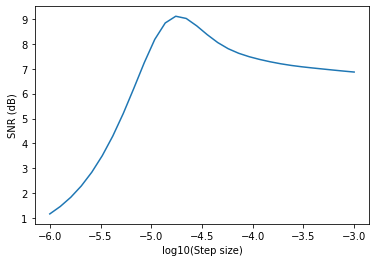

In [29]:
# Plot ERLE by stepsize
plt.plot(stepsize_array, ERLE_opt_weight) # ERLE_opt_weight, ERLE_store
plt.xlabel('log10(Step size)')
plt.ylabel('SNR (dB)')
plt.show()

In [42]:
# Calculate Misadjustment under different sample_size

filter_order = 10
samplesize_array = np.arange(1, 11) * 10
step_size = 0.00005

ERROR_store = []
ERLE_store = []
WEIGHT_OPT = []
weight_APA1_store = []

for mm in range(len(samplesize_array)): # step_size
    sample_size = samplesize_array[mm]
    weight_filter = np.zeros((filter_order))
    weight_APA1_store.append([])
    error_APA1_store = []

    for start in range(int((speech_desired.shape[0]-filter_order)/sample_size)):
        window_filter_x = np.array([speech_noisy[start*sample_size+i:start*sample_size+i+filter_order][::-1] for i in range(sample_size)])
        window_filter_y = np.array([speech_desired[start*sample_size+i+filter_order] for i in range(sample_size)])

        weight_filter = weight_filter + step_size * window_filter_x.T @ (window_filter_y - window_filter_x @ weight_filter)

        weight_APA1_store[mm].append(weight_filter)
        error_APA1_store.append(window_filter_y - window_filter_x @ weight_filter)

    error_APA1_store = np.array(error_APA1_store).flatten()

    ERROR_store.append(np.sqrt(np.sum(error_APA1_store ** 2)/np.sum(speech_desired ** 2)))
    ERLE_store.append(10 * math.log10(np.sum(speech_desired[0:int((speech_desired.shape[0]-filter_order)/sample_size)*sample_size] ** 2) / np.sum(error_APA1_store ** 2)))
    WEIGHT_OPT.append(weight_filter)


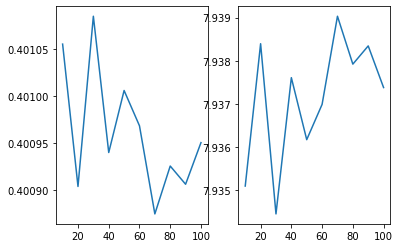

Error_Mean: 0.40096132727323563
Error_SD: 6.494910060854442e-05
ERLE_Mean: 7.937140701060628
ERLE_SD: 0.001406898200963926


In [43]:
ERROR_opt_weight = []
ERLE_opt_weight = []
for i in range(len(samplesize_array)):
    sample_size = samplesize_array[i]
    error_opt_weight = []
    for n in range (filter_order-1, speech_desired.shape[0]):
        error_opt_weight.append(speech_desired[n] - np.dot(WEIGHT_OPT[i], speech_noisy[n-filter_order+1:n+1][::-1]))
    error_opt_weight = np.array(error_opt_weight)
    ERROR_opt_weight.append(np.sqrt(np.sum(error_opt_weight ** 2)/np.sum(speech_desired ** 2)))
    ERLE_opt_weight.append(10 * math.log10(np.sum(speech_desired[filter_order-1:speech_desired.shape[0]] ** 2) / np.sum(error_opt_weight ** 2)))
    
# Plot misadjustment
ax1 = plt.subplot(1,2,1)
ax1.plot(samplesize_array, ERROR_opt_weight)
ax2 = plt.subplot(1,2,2)
ax2.plot(samplesize_array, ERLE_opt_weight)
plt.show()
print('Error_Mean:', np.mean(np.array(ERROR_opt_weight)))
print('Error_SD:', np.std(np.array(ERROR_opt_weight)))
print('ERLE_Mean:', np.mean(np.array(ERLE_opt_weight)))
print('ERLE_SD:', np.std(np.array(ERLE_opt_weight)))

In [44]:
# Calculate Misadjustment under different initialization conditions

filter_order = 10
sample_size = 50
step_size = 0.00005

WEIGHT_store = []
ERROR_store = []
ERLE_store = []
WEIGHT_OPT = []
weight_APA1_store = []

for i in range(20): # step_size
    
    weight_filter = np.random.normal(0, 0.1, filter_order)
    WEIGHT_store.append(weight_filter)
    weight_APA1_store.append([])
    error_APA1_store = []

    for start in range(int((speech_desired.shape[0]-filter_order)/sample_size)):
        window_filter_x = np.array([speech_noisy[start*sample_size+i:start*sample_size+i+filter_order][::-1] for i in range(sample_size)])
        window_filter_y = np.array([speech_desired[start*sample_size+i+filter_order] for i in range(sample_size)])

        weight_filter = weight_filter + step_size * window_filter_x.T @ (window_filter_y - window_filter_x @ weight_filter)

        weight_APA1_store[i].append(weight_filter)
        error_APA1_store.append(window_filter_y - window_filter_x @ weight_filter)

    error_APA1_store = np.array(error_APA1_store).flatten()

    ERROR_store.append(np.sum(error_APA1_store ** 2)/np.sum(speech_desired ** 2))
    ERLE_store.append(10 * math.log10(np.sum(speech_desired[0:int((speech_desired.shape[0]-filter_order)/sample_size)*sample_size] ** 2) / np.sum(error_APA1_store ** 2)))
    WEIGHT_OPT.append(weight_filter)


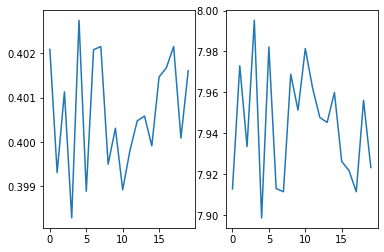

Error_Mean: 0.40065922706680135
Error_SD: 0.001272454137799048
ERLE_Mean: 7.943731165229025
ERLE_SD: 0.027591411850968466


In [45]:
ERROR_opt_weight = []
ERLE_opt_weight = []
for i in range(20):
    error_opt_weight = []
    for n in range (filter_order-1, speech_desired.shape[0]):
        error_opt_weight.append(speech_desired[n] - np.dot(WEIGHT_OPT[i], speech_noisy[n-filter_order+1:n+1][::-1]))
    error_opt_weight = np.array(error_opt_weight)
    ERROR_opt_weight.append(np.sqrt(np.sum(error_opt_weight ** 2)/np.sum(speech_desired ** 2)))
    ERLE_opt_weight.append(10 * math.log10(np.sum(speech_desired[filter_order-1:speech_desired.shape[0]] ** 2) / np.sum(error_opt_weight ** 2)))
    
# Plot misadjustment
ax1 = plt.subplot(1,2,1)
ax1.plot(ERROR_opt_weight)
ax2 = plt.subplot(1,2,2)
ax2.plot(ERLE_opt_weight)
plt.show()
print('Error_Mean:', np.mean(np.array(ERROR_opt_weight)))
print('Error_SD:', np.std(np.array(ERROR_opt_weight)))
print('ERLE_Mean:', np.mean(np.array(ERLE_opt_weight)))
print('ERLE_SD:', np.std(np.array(ERLE_opt_weight)))